In [5]:
# Install basic modules and make sure they are available with the latest pip version.
# Always updating PIP could be either good or bad, you just have to choose one base on the situation around.

# I use --quiet and --no-warn-script-location to hide the output of my directory paths
import sys
import os

!{sys.executable} -m pip install --upgrade pip matplotlib numpy tensorflow-macos tensorflow-metal scikit-learn --quiet --no-warn-script-location

^C
ERROR: Operation cancelled by user


In [ ]:
import os
import requests
import zipfile

# Path to current working directory
downlod_path = os.getcwd()
downlod_path = downlod_path.replace("investigation", "kaggledataset")

# Download the dataset using http request
# url = "https://www.kaggle.com/api/v1/datasets/download/mostafaabla/garbage-classification"
url = "https://www.kaggle.com/api/v1/datasets/download/sumn2u/garbage-classification-v2"
response = requests.get(url, allow_redirects=True)

# zip_path = os.path.join(downlod_path, 'garbage-classification.zip')
zip_path = os.path.join(downlod_path, 'garbage-classification-v2.zip')
with open(zip_path, 'wb') as file:
    file.write(response.content)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(downlod_path)

print(f"Dataset downloaded and extracted to {downlod_path}")

Dataset downloaded and extracted to /Users/aoladeji/SoftwareDevelopment/BSC/Year3/CM-3070-Final-Project/code/kaggledataset


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define paths
dataset_path = os.path.join(os.getcwd().replace("investigation", "kaggledataset"), 'garbage_classification')

# Create ImageDataGenerator instances for training and validation
# The validation split is set to 0.2, which means that 20% of the data will be used for validation
# The remaining 80% will be used for training
# The data is also rescaled to values between 0 and 1
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training data
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Extract data and labels from generators
train_data, train_labels = next(train_generator)
test_data, test_labels = next(validation_generator)

print(f"Train data shape: {train_data.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"Test labels shape: {test_labels.shape}")

Found 12415 images belonging to 12 classes.
Found 3100 images belonging to 12 classes.
Train data shape: (32, 224, 224, 3)
Train labels shape: (32, 12)
Test data shape: (32, 224, 224, 3)
Test labels shape: (32, 12)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

num_classes = train_labels.shape[1]  # Based on the one-hot encoded labels

model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
result = model.fit(train_data, train_labels, epochs=20, verbose=1)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0312 - loss: 4.5259
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.7812 - loss: 11.7388
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 1.0000 - loss: 1.8626e-08
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9688 - loss: 0.3971
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - a

In [ ]:
# Print layer names and outputs
print(tf.__version__)
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.compute_dtype)

2.16.2
0 conv2d_16 float32
1 batch_normalization_16 float32
2 max_pooling2d_16 float32
3 conv2d_17 float32
4 batch_normalization_17 float32
5 max_pooling2d_17 float32
6 flatten_8 float32
7 dense_16 float32
8 dense_17 float32


In [ ]:
model.evaluate(test_data, test_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.0312 - loss: 97.1887


[97.18865203857422, 0.03125]

In [ ]:
# intermediate_model = keras.models.Model(model.inputs, [
#   model.get_layer("conv2d_17").output,
#   model.get_layer("dense_17").output
# ])
model.layers[-2].output

<KerasTensor shape=(None, 128), dtype=float32, sparse=False, name=keras_tensor_88>

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report
from tensorflow.keras.models import Model

# Convert one-hot labels to integer class labels
train_label_indices = tf.argmax(train_labels, axis=1).numpy()
test_label_indices = tf.argmax(test_labels, axis=1).numpy()

# Create a sub-model ending at the second-to-last layer (Dense layer before softmax)
intermediate_model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

# Pass the data through the intermediate model
train_features = intermediate_model.predict(train_data)
test_features = intermediate_model.predict(test_data)

# Convert features to NumPy arrays (if not already)
train_features = train_features.reshape(train_features.shape[0], -1)
test_features = test_features.reshape(test_features.shape[0], -1)

# Now use train_features and test_features with an SVM
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(train_features, train_label_indices)
svm_accuracy = clf.score(test_features, test_label_indices)

print("SVM Accuracy:", svm_accuracy)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
SVM Accuracy: 0.1875


/opt/tools/.pyenv/versions/cm-3070/lib/python3.11/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_80']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the table
results_table = {
    "Algorithm": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Notes / Parameters": []
}

### CNN (Baseline)
# Evaluate the CNN model on test data
cnn_predictions = model.predict(test_data)
cnn_predicted_classes = np.argmax(cnn_predictions, axis=1)

# Calculate metrics
cnn_accuracy = accuracy_score(test_label_indices, cnn_predicted_classes)
cnn_precision = precision_score(test_label_indices, cnn_predicted_classes, average='weighted')
cnn_recall = recall_score(test_label_indices, cnn_predicted_classes, average='weighted')
cnn_f1 = f1_score(test_label_indices, cnn_predicted_classes, average='weighted')

# Add to table
results_table["Algorithm"].append("CNN (Baseline)")
results_table["Accuracy"].append(cnn_accuracy)
results_table["Precision"].append(cnn_precision)
results_table["Recall"].append(cnn_recall)
results_table["F1-Score"].append(cnn_f1)
results_table["Notes / Parameters"].append("Input: 224x224, lr=0.001")

### Transfer Learning (ResNet50)
# Import ResNet50 and fine-tune on the dataset
from tensorflow.keras.applications import ResNet50

resnet_model = tf.keras.Sequential([
    ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    layers.Flatten(),
    layers.Dense(num_classes, activation='softmax')
])

resnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

resnet_model.fit(train_data, train_labels, epochs=5, verbose=1)  # Fewer epochs for demonstration
resnet_predictions = resnet_model.predict(test_data)
resnet_predicted_classes = np.argmax(resnet_predictions, axis=1)

# Calculate metrics
resnet_accuracy = accuracy_score(test_label_indices, resnet_predicted_classes)
resnet_precision = precision_score(test_label_indices, resnet_predicted_classes, average='weighted')
resnet_recall = recall_score(test_label_indices, resnet_predicted_classes, average='weighted')
resnet_f1 = f1_score(test_label_indices, resnet_predicted_classes, average='weighted')

# Add to table
results_table["Algorithm"].append("Transfer Learning (ResNet50)")
results_table["Accuracy"].append(resnet_accuracy)
results_table["Precision"].append(resnet_precision)
results_table["Recall"].append(resnet_recall)
results_table["F1-Score"].append(resnet_f1)
results_table["Notes / Parameters"].append("Fine-tuned last 2 layers, lr=0.0001")

### SVM (Linear Kernel)
# Already implemented in your code. Use train_features and test_features with an SVM
svm_predictions = clf.predict(test_features)

# Calculate metrics
svm_accuracy = accuracy_score(test_label_indices, svm_predictions)
svm_precision = precision_score(test_label_indices, svm_predictions, average='weighted')
svm_recall = recall_score(test_label_indices, svm_predictions, average='weighted')
svm_f1 = f1_score(test_label_indices, svm_predictions, average='weighted')

# Add to table
results_table["Algorithm"].append("SVM (Linear Kernel)")
results_table["Accuracy"].append(svm_accuracy)
results_table["Precision"].append(svm_precision)
results_table["Recall"].append(svm_recall)
results_table["F1-Score"].append(svm_f1)
results_table["Notes / Parameters"].append("Features from CNN penultimate layer")

### Ensemble (CNN + SVM)
# Weighted ensemble: 70% CNN + 30% SVM
ensemble_predictions = (0.7 * cnn_predictions + 0.3 * np.eye(num_classes)[svm_predictions])
ensemble_predicted_classes = np.argmax(ensemble_predictions, axis=1)

# Calculate metrics
ensemble_accuracy = accuracy_score(test_label_indices, ensemble_predicted_classes)
ensemble_precision = precision_score(test_label_indices, ensemble_predicted_classes, average='weighted')
ensemble_recall = recall_score(test_label_indices, ensemble_predicted_classes, average='weighted')
ensemble_f1 = f1_score(test_label_indices, ensemble_predicted_classes, average='weighted')

# Add to table
results_table["Algorithm"].append("Ensemble (CNN + SVM)")
results_table["Accuracy"].append(ensemble_accuracy)
results_table["Precision"].append(ensemble_precision)
results_table["Recall"].append(ensemble_recall)
results_table["F1-Score"].append(ensemble_f1)
results_table["Notes / Parameters"].append("Weighting: 0.7 CNN, 0.3 SVM")

# Display the final table
import pandas as pd
results_df = pd.DataFrame(results_table)
print(results_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


/opt/tools/.pyenv/versions/cm-3070/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 36s 36s/step - accuracy: 0.1250 - loss: 4.3195
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step - accuracy: 1.0000 - loss: 1.3337e-04
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 1.0000 - loss: 1.6573e-05
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 1.0000 - loss: 1.0851e-05
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 1.0000 - loss: 1.2084e-05
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


/opt/tools/.pyenv/versions/cm-3070/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/tools/.pyenv/versions/cm-3070/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/tools/.pyenv/versions/cm-3070/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

                      Algorithm  Accuracy  Precision   Recall  F1-Score  \
0                CNN (Baseline)   0.03125   0.000977  0.03125  0.001894   
1  Transfer Learning (ResNet50)   0.03125   0.000977  0.03125  0.001894   
2           SVM (Linear Kernel)   0.18750   0.249543  0.18750  0.189161   
3          Ensemble (CNN + SVM)   0.03125   0.000977  0.03125  0.001894   

                    Notes / Parameters  
0             Input: 224x224, lr=0.001  
1  Fine-tuned last 2 layers, lr=0.0001  
2  Features from CNN penultimate layer  
3          Weighting: 0.7 CNN, 0.3 SVM  


In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import Model
import numpy as np
import os
from PIL import Image
import glob

# Define dataset path
dataset_path = os.path.join(os.getcwd().replace("investigation", "kaggledataset"), 'garbage_classification')

# Load all images and labels
image_data = []
labels = []
class_names = sorted(os.listdir(dataset_path))
print(f"Classes: {class_names}")

for class_idx, class_name in enumerate(class_names):
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in glob.glob(os.path.join(class_folder, "*.jpg")):
            try:
                # Open the image, resize, and normalize
                img = Image.open(img_file).convert("RGB").resize((256, 256))
                image_data.append(np.array(img) / 255.0)  # Normalize to 0-1 range
                labels.append(class_idx)
            except Exception as e:
                print(f"Error loading image {img_file}: {e}")

# Convert to NumPy arrays
image_data = np.array(image_data, dtype="float32")
labels = np.array(labels)

# One-hot encode the labels
labels_one_hot = to_categorical(labels, num_classes=len(class_names))

# Split data into 80/20 train/validation
train_data, test_data, train_labels, test_labels = train_test_split(
    image_data, labels_one_hot, test_size=0.2, random_state=42, stratify=labels
)

print(f"Train data shape: {train_data.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Validation data shape: {test_data.shape}")
print(f"Validation labels shape: {test_labels.shape}")


Classes: ['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']
Train data shape: (12412, 256, 256, 3)
Train labels shape: (12412, 12)
Validation data shape: (3103, 256, 256, 3)
Validation labels shape: (3103, 12)


In [ ]:
# Define the CNN model
num_classes = len(class_names)  # Number of classes

model = models.Sequential()

# Layer 0: Input image of size 256x256
input_shape = (256, 256, 3)

# Layer 1: Convolution with 96 filters, size 11x11, stride 4, padding 2
model.add(layers.ZeroPadding2D(padding=2, input_shape=input_shape))
model.add(layers.Conv2D(96, kernel_size=11, strides=4, activation='relu'))
model.add(layers.BatchNormalization())  # Add BatchNorm
model.add(layers.ReLU())  # Apply activation after BatchNorm

# Layer 2: Max-Pooling with a size 3x3 filter, stride 2
model.add(layers.MaxPooling2D(pool_size=3, strides=2))

# Layer 3: Convolution with 192 filters, size 5x5, stride 1, padding 2
model.add(layers.ZeroPadding2D(padding=2))
model.add(layers.Conv2D(192, kernel_size=5, strides=1, activation='relu'))

# Layer 4: Max-Pooling with a size 3x3 filter, stride 2
model.add(layers.MaxPooling2D(pool_size=3, strides=2))

# Layer 5: Convolution with 288 filters, size 3x3, stride 1, padding 1
model.add(layers.ZeroPadding2D(padding=1))
model.add(layers.Conv2D(288, kernel_size=3, strides=1, activation='relu'))

# Layer 6: Convolution with 288 filters, size 3x3, stride 1, padding 1
model.add(layers.ZeroPadding2D(padding=1))
model.add(layers.Conv2D(288, kernel_size=3, strides=1, activation='relu'))

# Layer 7: Convolution with 192 filters, size 3x3, stride 1, padding 1
model.add(layers.ZeroPadding2D(padding=1))
model.add(layers.Conv2D(192, kernel_size=3, strides=1, activation='relu'))

# Layer 8: Max-Pooling with a size 3x3 filter, stride 2
model.add(layers.MaxPooling2D(pool_size=3, strides=2))

# Layer 9: Fully Connected with 4096 neurons
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))

# Layer 10: Fully Connected with 4096 neurons
model.add(layers.Dense(4096, activation='relu'))

# Layer 11: Fully Connected with 5 neurons
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

/opt/tools/.pyenv/versions/cm-3070/lib/python3.11/site-packages/keras/src/layers/reshaping/zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-12-11 10:59:28.481381: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2024-12-11 10:59:28.481429: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 48.00 GB
2024-12-11 10:59:28.481443: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 18.00 GB
2024-12-11 10:59:28.481462: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-11 10:59:28.481482: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow devi

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)  │ (None, 260, 260, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 63, 63, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 63, 63, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 63, 63, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_1                │ (None, 35, 35, 96)     │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 31, 31, 192)    │       460,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_2                │ (None, 17, 17, 192)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 288)    │       497,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_3                │ (None, 17, 17, 288)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 288)    │       746,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_4                │ (None, 17, 17, 288)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 15, 15, 192)    │       497,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    38,539,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │        49,164 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,608,652 (219.76 MB)

 Trainable params: 57,608,460 (219.76 MB)

 Non-trainable params: 192 (768.00 B)

Class 0 (battery): 945 images
Class 1 (biological): 985 images
Class 2 (brown-glass): 607 images
Class 3 (cardboard): 891 images
Class 4 (clothes): 5325 images
Class 5 (green-glass): 629 images
Class 6 (metal): 769 images
Class 7 (paper): 1050 images
Class 8 (plastic): 865 images
Class 9 (shoes): 1977 images
Class 10 (trash): 697 images
Class 11 (white-glass): 775 images


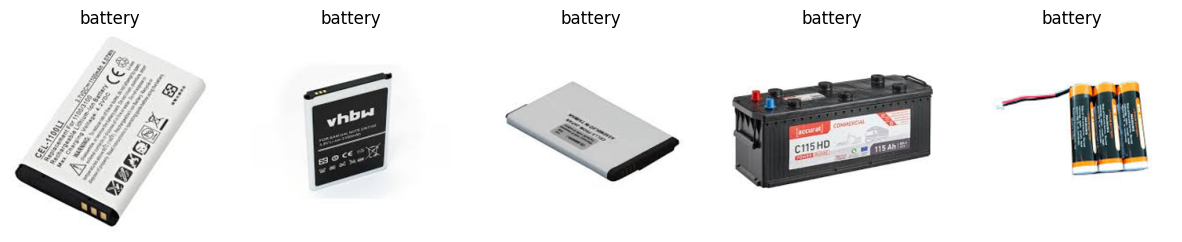

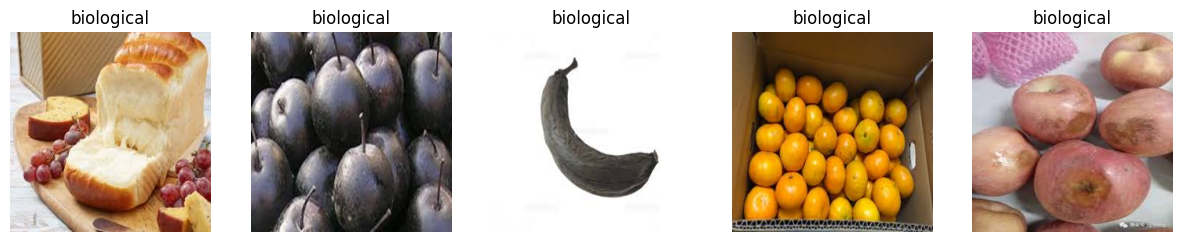

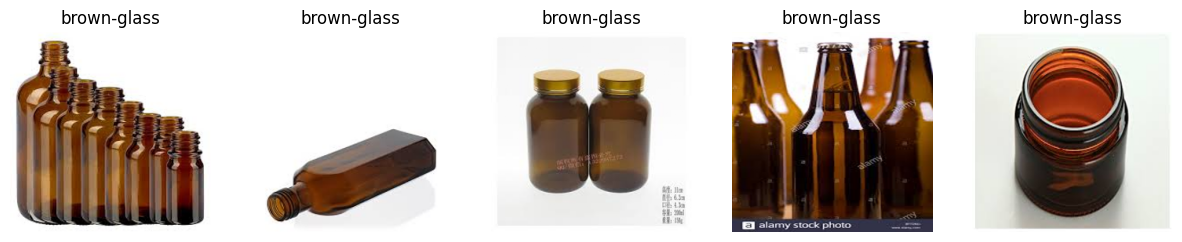

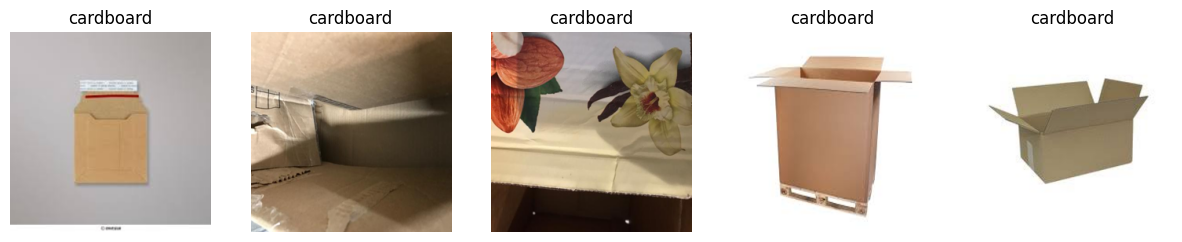

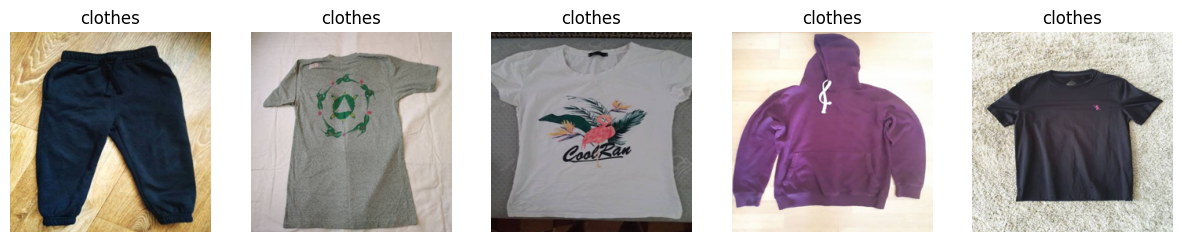

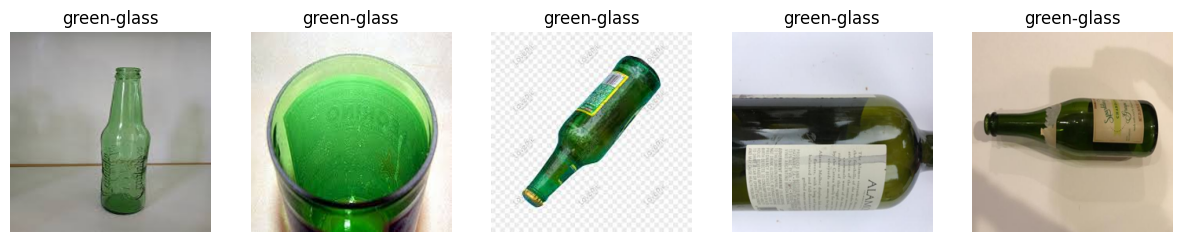

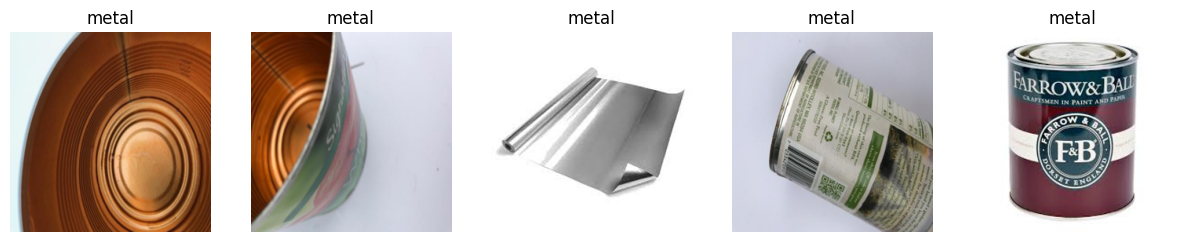

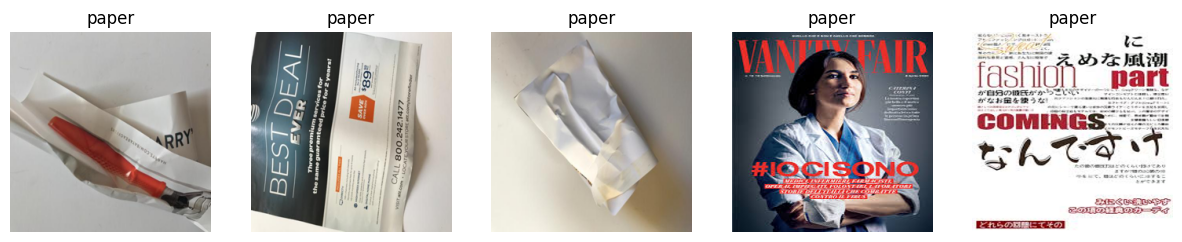

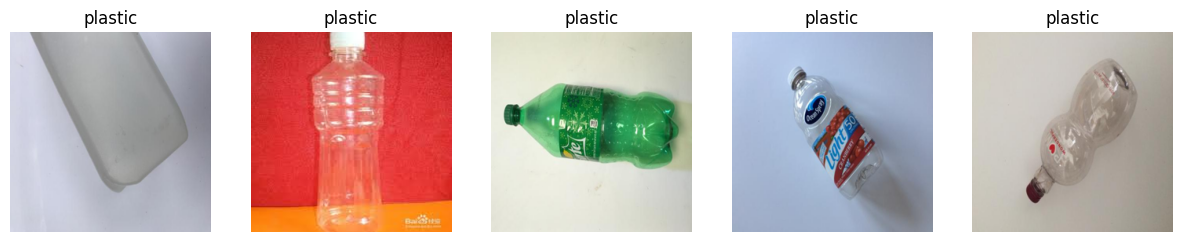

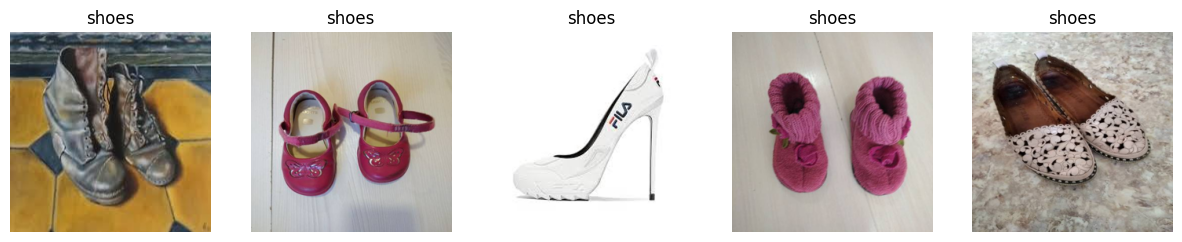

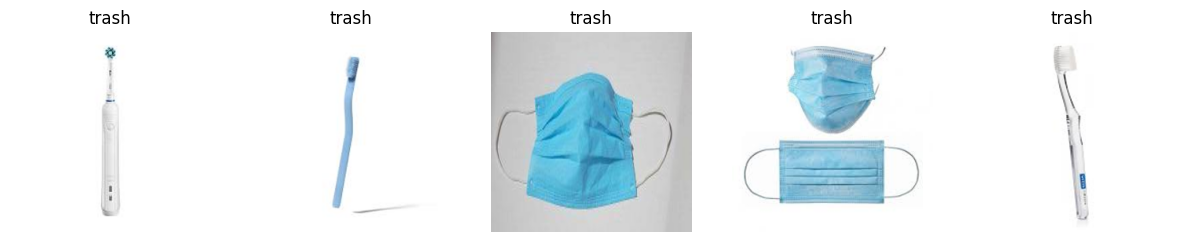

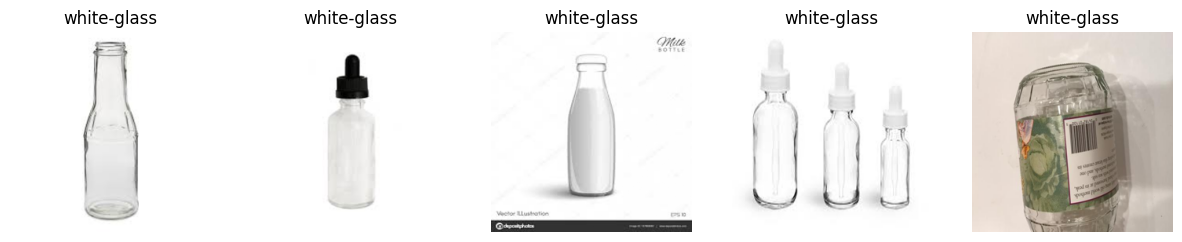

Image data shape: (15515, 256, 256, 3)
Labels shape: (15515,)
Image data range: 0.0 to 1.0
One-hot encoded labels sample:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
# Investigate labels and training data
from collections import Counter

label_counts = Counter(labels)
for class_idx, count in label_counts.items():
    print(f"Class {class_idx} ({class_names[class_idx]}): {count} images")


import matplotlib.pyplot as plt

num_samples = 5  # Number of images to display per class

for class_idx, class_name in enumerate(class_names):
    idxs = np.where(labels == class_idx)[0][:num_samples]
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(idxs):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image_data[idx])
        plt.title(f"{class_name}")
        plt.axis('off')
    plt.show()

print(f"Image data shape: {image_data.shape}")
print(f"Labels shape: {labels.shape}")
print(f"Image data range: {image_data.min()} to {image_data.max()}")

print("One-hot encoded labels sample:")
print(labels_one_hot[:5])

In [ ]:
# from tensorflow.keras.optimizers import SGD

# # optimizer = SGD(learning_rate=0.01, momentum=0.9)
# optimizer = SGD(learning_rate=1e-4, momentum=0.9, clipnorm=1.0) # Got 60% accuracy
# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Achieved 60% accuracy with this fit
# result = model.fit(train_data, train_labels, epochs=60, batch_size=32, validation_data=(test_data, test_labels), verbose=1)

In [2]:
from tensorflow.keras import Model
num_classes = len(class_names)  # Number of classes

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
# Input layer
img_input = layers.Input(shape=(256, 256, 3))

# First convolution extracts 32 filters that are 3x3
x = layers.Conv2D(
    32, 3, 
    activation=None, 
    kernel_regularizer=tf.keras.regularizers.l2(0.02),
    kernel_initializer='he_normal'
)(img_input)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 64 filters that are 3x3
x = layers.Conv2D(
    64, 3, 
    activation=None, 
    kernel_regularizer=tf.keras.regularizers.l2(0.02),
    kernel_initializer='he_normal'
)(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 128 filters that are 3x3
x = layers.Conv2D(
    128, 3, 
    activation=None, 
    kernel_regularizer=tf.keras.regularizers.l2(0.02),
    kernel_initializer='he_normal'
)(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.MaxPooling2D(2)(x)

# Flatten and Dense layers
x = layers.Flatten()(x)
x = layers.Dense(
    512, 
    activation=None, 
    kernel_regularizer=tf.keras.regularizers.l2(0.02),
    kernel_initializer='he_normal'
)(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Dropout(0.8)(x)

# Output layer
output = layers.Dense(
    num_classes, 
    activation='softmax', 
    kernel_initializer='he_normal'
)(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)
     

model.summary()

2024-12-11 15:22:37.103423: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2024-12-11 15:22:37.103467: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 48.00 GB
2024-12-11 15:22:37.103483: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 18.00 GB
2024-12-11 15:22:37.103499: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-11 15:22:37.103514: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 254, 254, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 125, 125, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    58,982,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         6,156 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,085,260 (225.39 MB)

 Trainable params: 59,083,788 (225.39 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [3]:
from tensorflow.keras.optimizers import RMSprop

# Define optimizer
optimizer = RMSprop(learning_rate=0.0001)

model.compile(
  loss='categorical_crossentropy',
  optimizer=optimizer,
  metrics=['acc']
)

In [ ]:
# Maximu 61% accuracy with this fit
# from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)

# lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, min_lr=1e-6)
# result = model.fit(
#   train_data,
#   train_labels,
#   epochs=120,
#   batch_size=32,
#   validation_data=(test_data, test_labels),
#   verbose=1,
#   callbacks=[lr_scheduler, early_stopping]
# )

In [4]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
class_weights_dict = dict(enumerate(class_weights))

early_stopping = EarlyStopping(monitor='val_acc', patience=20, verbose=1, restore_best_weights=True)

def smooth_lr(epoch):
    base_lr = 0.0001
    decay = 0.9  # Slight decay every epoch
    return base_lr * (decay ** epoch)
    
lr_scheduler = LearningRateScheduler(smooth_lr)

# Cyclical Learning Rate
def clr(epoch):
    base_lr = 0.0001
    max_lr = 0.001
    step_size = 10
    cycle = np.floor(1 + epoch / (2 * step_size))
    x = np.abs(epoch / step_size - 2 * cycle + 1)
    lr = base_lr + (max_lr - base_lr) * max(0, (1 - x))
    return lr

clr_callback = LearningRateScheduler(clr)

# Class weights
class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
class_weights_dict = dict(enumerate(class_weights))

validation_data = tf.data.Dataset.from_tensor_slices((test_data, test_labels)).shuffle(1000).batch(32)


result = model.fit(
  train_data,
  train_labels,
  epochs=120,
  batch_size=32,
  validation_data=validation_data,
  verbose=1,
  class_weight=class_weights_dict,
  callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/120


2024-12-11 15:22:55.872473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


388/388 ━━━━━━━━━━━━━━━━━━━━ 48s 117ms/step - acc: 0.3534 - loss: 25.7022 - val_acc: 0.5643 - val_loss: 11.7155 - learning_rate: 1.0000e-04
Epoch 2/120
388/388 ━━━━━━━━━━━━━━━━━━━━ 45s 114ms/step - acc: 0.5321 - loss: 10.7612 - val_acc: 0.6452 - val_loss: 8.2868 - learning_rate: 9.0000e-05
Epoch 3/120
388/388 ━━━━━━━━━━━━━━━━━━━━ 45s 115ms/step - acc: 0.5894 - loss: 8.2979 - val_acc: 0.6500 - val_loss: 7.3636 - learning_rate: 8.1000e-05
Epoch 4/120
388/388 ━━━━━━━━━━━━━━━━━━━━ 45s 117ms/step - acc: 0.6234 - loss: 7.4079 - val_acc: 0.7196 - val_loss: 6.6907 - learning_rate: 7.2900e-05
Epoch 5/120
388/388 ━━━━━━━━━━━━━━━━━━━━ 45s 115ms/step - acc: 0.6613 - loss: 6.7915 - val_acc: 0.6900 - val_loss: 6.3664 - learning_rate: 6.5610e-05
Epoch 6/120
388/388 ━━━━━━━━━━━━━━━━━━━━ 45s 115ms/step - acc: 0.6875 - loss: 6.3473 - val_acc: 0.7013 - val_loss: 6.1175 - learning_rate: 5.9049e-05
Epoch 7/120
388/388 ━━━━━━━━━━━━━━━━━━━━ 44s 114ms/step - acc: 0.7017 - loss: 6.0542 - val_acc: 0.6706 - val_

97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
Overall Test Accuracy: 0.79


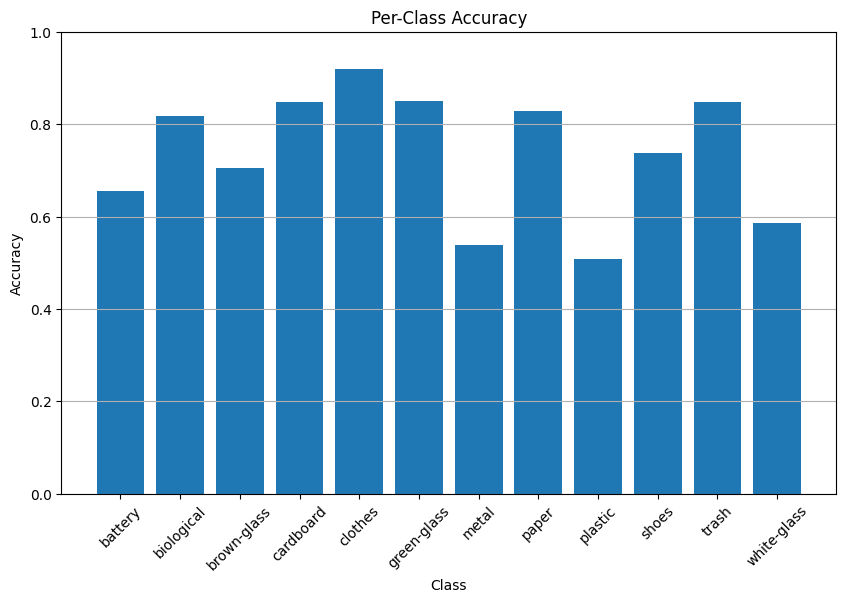

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Get predictions for the test data
predictions = model.predict(test_data)

# Convert predictions and true labels from one-hot to class indices
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Calculate overall accuracy
overall_accuracy = np.sum(predicted_classes == true_classes) / len(true_classes)
print(f"Overall Test Accuracy: {overall_accuracy:.2f}")

# Calculate per-class accuracy
num_classes = len(class_names)
class_accuracies = []
for class_index in range(num_classes):
    indices = np.where(true_classes == class_index)[0]
    class_correct = np.sum(predicted_classes[indices] == true_classes[indices])
    class_accuracy = class_correct / len(indices) if len(indices) > 0 else 0
    class_accuracies.append(class_accuracy)

# Plot per-class accuracy
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_accuracies)
plt.title("Per-Class Accuracy")
plt.xlabel("Class")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


In [9]:
model.save("saved_models/garbage_classification_model_79_h5.h5")
model.save("saved_models/garbage_classification_model_79_tf_keras.keras")